In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# adjust 한글 font
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
# plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

# Chapter 6. Unsupervised Learning

## 6-1 Association Rules

<table border="1" class="docutils">
    <colgroup>
        <col width="20%">
        <col width="60%">
    </colgroup>
    <thead valign="bottom">
        <tr class="row-odd"><th class="head">ID</th>
            <th class="head">Item</th>
        </tr>
    </thead>
    <tbody valign="top">
        <tr class="row-even"><td>1</td>
            <td>계란, 우유</td>
        </tr>
        <tr class="row-odd"><td>2</td>
            <td>계란, <u>기저귀</u>, 
                <u><big>맥주</big></u>, 사과</td>
        </tr>
        <tr class="row-even"><td>3</td>
            <td>우유, <u>기저귀</u>, 
                <u><big>맥주</big></u>, 콜라</td>
        </tr>
        <tr class="row-odd"><td>4</td>
            <td>계란, 우유, 기저귀</td>
        </tr>
        <tr class="row-even"><td>5</td>
            <td>계란, 우유, <big>맥주</big>, 콜라</td>
        </tr>
    </tbody>
</table>

>#### 위 테이블에서의 연관 규칙
- 연관규칙 : "만일 **맥주**를 산다면, **기저귀**도 산다."
$$\text{Arule}(X\rightarrow{Y})\,=\,\text{\{맥주\}}\rightarrow\text{\{기저귀\}}$$
- 조건절 : "만일 **맥주**를 산다면"
- 결과절 : "**기저귀**도 산다."



>#### 지지도, 신뢰도, 향상도
- 지지도(support)
    - 조건절이 일어날 확률
    - $n(\text{2번}, \text{3번})\,/\,N\,=\,2\,/\,5=\,0.4$
$$\text{s}(X\rightarrow{Y})\,=\,{{n(X\cup{Y})}\over{N}}$$
- 신뢰도(confidence)
    - 조건절이 일어났을 때 결과절이 일어날 확률
    - $n(\text{2번}, \text{3번})\,/\,n(\text{2번}, \text{3번}, \text{5번})\,=\,2\,/\,3=\,0.667$
$$\text{c}(X\rightarrow{Y})\,=\,{{n(X\cup{Y})}\over{n(X)}}$$
- 향상도(Lift)
    - 조건절과 결과절이 서로 독립일 때에 비해, 두 사건이 동시에 얼마나 발생하는가의 비율
    - 즉, 우연히 '기저귀'를 살 확률에 비해, '맥주'를 산다면 '기저귀'도 사는가ㅣ
    - $0.667\,/\,(1\,-\,0.4)\,=\,1.111$
$$\text{Lift}(X\rightarrow{Y})\,=\,{{\text{c}(X\rightarrow{Y})}\over{\text{s}(Y)}}$$
- 위의 세가지를 통해
    - 지지도 : 규칙의 빈도가 많은가, 구성비가 높은가
    - 신뢰도 : 규칙의 조건부확률이 높은가
    - 향상도 : 규칙이 우연에 비해 서로 관계가 있는가
- 즉,
    1. _**일정수준 이하 '지지도'와 '신뢰도'를 가진 규칙은 제외**_
    2. _**'향상도'가 높은 순(130%)으로 유용한 규칙만 제출**_

>- **모든 항목들의 집합(item set)**이 $I=\{i_1, i_2, ..., i_k\}$일 때,
- **모든 가능한 부분집합의 개수**는 공집합을 제외하고 $M=2^k-1$개
- **모든 가능한 연관규칙의 개수**는 $3^k-2^{k+1}+1$
- Item 개수의 증가에 다라 부분집합과 연관규칙의 양이 기하급수적으로 늘어나는 문제
- 출처 : https://rfriend.tistory.com/m/192?category=706118
><img src="https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile4.uf.tistory.com%2Fimage%2F250C6346573FAB230A376E" width="400" height="200">
>- 즉, 애초에 계산할 필요가 없는 항목 집합(item set)을 줄이는 방법이 필요
    - **Apriori algorithm**
    - 위의 링크 참조

## 6-2 CF(Collaborative Filtering)

>- 챗봇의 rule 기반과 association rule은 전혀 다른 이야기!
- rule을 미리 setting을 해놓는 것
- 이를 편하게 변경시킬 수 있는 UI를 관리자가 만들어 놓음

## 6-3 Clustering

>### 클러스터링이란?
- 데이터 set을 부분으로 적절히 나누는 기법
    - 이때 구분된 부분집합을 "군집(cluster)"이라고 함
    - 한 데이터 포인트는 한 군집에 속함
- 생각해보면 이 기법도 단순히 분류하는 기법이지만 label이 존재하지 않음
- data-driven으로 유사성/거리 등을 구해서 집단을 구분하는 것
- 구분이 잘되었다면
    1. 집단 내에서는 거리가 가깝고
    2. 집단 간의 거리는 멀 것임

>### Clustering의 다양한 methods
- partiioning
- hierarchical
- density-based
- Grid-based

>>### first, partitioning
- 대표적으로 K-means, K-medoid
- K개 그룹으로 나눔
    - K is Hyperparameter
    - K는 집단을 몇 개로 나눌 것인지를 뜻함

>>### K-means Clustering
- 참고 : https://bcho.tistory.com/1203
- K개 클러스터를 만들기 위해 K개의 점을 찍은 후, 각각의 데이터 포인트들이 중심과 얼마나 가까운가를 cost로 정의
    - 이 cost를 최소화하는 문제
    $$\underset{b,\,w}{min}\sum_{i}^{n}\sum_{j}^{k}w_{ij}{||x_i-b_j||}^2\;s.t.\,\sum_{j}w_{ij}=1,\,\forall{j}$$
    - 데이터 n개
    - 클러스터 k개
    - $x_i$는 각각의 데이터 포인트
    - $b_j$는 j번째 클러스터의 중심
    - $w_{ij}$는 i번째 데이터가 j번째 클러스터에 속하면 1, 아니면 0인 binary variable
        - 마지막의 constraint는 각 데이터 포인트는 반드시 하나의 클러스터에 포함되어야 한다는 제약 조건을 의미
    - b와 w를 계속 업데이트하여 더 이상 변하지 않을 때까지 optimization을 반복
        - 단점 : local optima(지역 최적화)에 수렴하므로 최초 initial 중심 값에 매우 민감함
- 군집개수 K는 사용자가 정함
- 몇 개의 군집화가 적절한가?
    - inertia value : 군집화가 된 후에 각 중심점에서 군집의 데이터간의 거리를 합산한 것
        - 즉, 군집의 응집도를 의미
        - 이 값이 작을수록 응집도가 높아 군집화가 잘 되었다고 평가할 수 있음

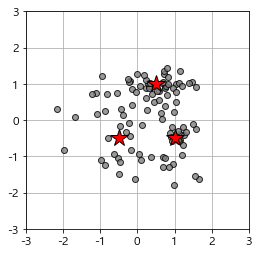

In [161]:
# 데이터 생성 ----------------------------------------------------------------
np.random.seed(1)
N = 100
K = 3
T3 = np.zeros((N, 3), dtype=np.uint8)
X = np.zeros((N, 2))
X_range0 = [-3, 3]
X_range1 = [-3, 3]
X_col = ['cornflowerblue', 'black', 'white']
Mu = np.array(
    [[-.5, -.5],
     [.5, 1.0],
     [1, -.5]]
)
Sig = np.array(
    [[.7, .7],
     [.8, .3],
     [.3, .8]]
)
Pi = np.array([.4, .8, 1.])
for n in range(N):
   # 균등분포로 누적확률 값 계산
    wk = np.random.rand()
    for k in range(K):
        if wk < Pi[k]:
            T3[n, k] = 1
            break
    for axis in range(2):
        # 정규분포로 난수 발생
        X[n, axis] = np.random.randn() * Sig[T3[n, :]==1, axis] + Mu[T3[n, :]==1, axis]
# 데이터 그리기 --------------------------------------------------------------
def show_data(x):
    plt.plot(x[:, 0], x[:, 1], ls='none',
            marker='o', markersize=6,
            markeredgecolor='k', color='gray', alpha=.8)
    plt.grid(True)
# 메인 -----------------------------------------------------------------------
plt.figure(1, figsize=(4, 4))
show_data(X)
plt.plot(Mu[:, 0], Mu[:, 1], marker='*', ls='none',
        ms=18, markeredgecolor='k', markerfacecolor='r')
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()

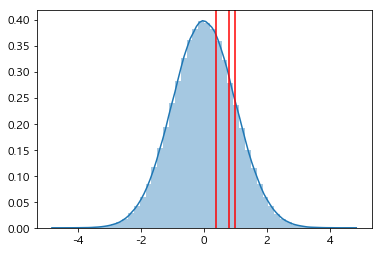

In [162]:
# 정규 분포
sns.distplot(np.random.randn(1000000))
plt.axvline(.4, color='r')
plt.axvline(.8, color='r')
plt.axvline(1., color='r')

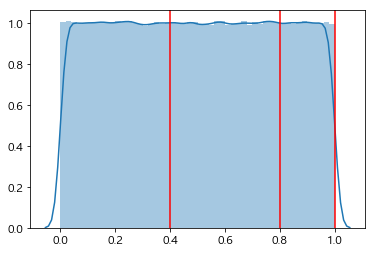

In [163]:
# 균등 분포
sns.distplot(np.random.rand(1000000))
plt.axvline(.4, color='r')
plt.axvline(.8, color='r')
plt.axvline(1., color='r')

In [164]:
from scipy.stats import norm
p1, p2, p3 = norm.cdf(.4), norm.cdf(.8), norm.cdf(1.)
print('z=.4 : {:.4f}, z=.8 : {:.4f}, z=1. : {:.4f}'.format(p1, p2, p3))

z=.4 : 0.6554, z=.8 : 0.7881, z=1. : 0.8413


In [165]:
np.random.seed(1)
T1 = np.zeros((N, 3), dtype=np.uint8)
T2 = np.zeros((N, 3), dtype=np.uint8)
Pi = np.array([.4, .8, 1.])
for n in range(N):
    wk = np.random.randn()
    for k in range(K):
        if wk < Pi[k]:
            T1[n, k] = 1
    for k in range(K):
        if wk < Pi[k]:
            T2[n, k] = 1
            break

In [166]:
T1.sum(0) # 정규분포로 채집

array([66, 78, 86], dtype=uint32)

In [167]:
T2.sum(0) # break로 인해 조건부 적용

array([66, 12,  8], dtype=uint32)

In [168]:
T3.sum(axis=0)

array([30, 44, 26], dtype=uint32)

In [169]:
T = np.zeros((N, 3), dtype=np.uint8)
Pi = np.array([.4, .8, 1.])
for n in range(N):
    wk = np.random.rand()
    for k in range(K):
        if wk < Pi[k]:
            T[n, k] = 1

In [170]:
T.sum(axis=0)

array([ 41,  76, 100], dtype=uint32)

In [171]:
Sig

array([[0.7, 0.7],
       [0.8, 0.3],
       [0.3, 0.8]])

In [172]:
Sig[T3[n, :] == 1, :]

array([[0.3, 0.8]])

### K-means 단계별로 실습해보기

#### Step 0: 변수의 준비와 초기화
- k번째 클러스터의 중심 벡터
$$\mu_{k}\,=\,[\mu_{k0},\mu_{k1}]\quad(k\,=\,0,\,1,\,2)$$
- K와 3개의 중심 벡터를 다음과 같이 설정
$$K\,=\,3,\quad\mu_0\,=\,[-2,\,1],\quad\mu_1\,=\,[-2,\,0],\quad\mu_2\,=\,[-2,\,-1]$$
- 클래스 지시 변수 R은 각 데이터가 어느 클래스에 속해있는지 나타낸 행렬
$$r_{nk} = \begin{cases}
  1, & 데이터\;n이\;k에\;속하는\;경우 \\
  0, & 데이터\;n이\;k에\;속하지\;않은\;경우
\end{cases}$$
- 데이터 n에 대한 클래스 지시 변수를 벡터로 나타내면, 클래스 0에 속하는 경우
$$r_n\,=\,[r_{n0},\,r_{n1},\,r_{n2}]\,=\,[1,\,0,\,0]$$

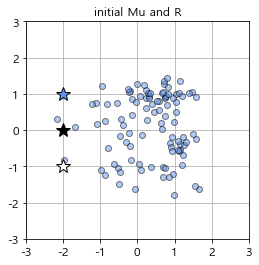

In [219]:
# Mu 및 R 초기화 -------------------------------------------------------------
Mu = np.array(
    [[-2, 1],
     [-2, 0],
     [-2, -1]]
)
R = np.c_[np.ones((N, 1), dtype=int), 
          np.zeros((N, 2), dtype=int)]
# 데이터를 그리는 함수 -------------------------------------------------------
def show_prm(x, r, mu, col):
    for k in range(K):
        # 데이터 분포의 묘사
        plt.plot(x[r[:, k] == 1, 0],
                 x[r[:, k] == 1, 1],
                marker='o',
                markerfacecolor=X_col[k], markeredgecolor='k',
                markersize=6, alpha=.5, ls='none')
        # 데이터의 평균을 '별표'로 묘사
        plt.plot(mu[k, 0],
                 mu[k, 1],
                marker='*',
                markerfacecolor=X_col[k], markeredgecolor='k',
                markersize=15, markeredgewidth=1)
        plt.xlim(X_range0)
        plt.ylim(X_range1)
        plt.grid(True)
# 메인 -----------------------------------------------------------------------
plt.figure(figsize=(4, 4))
show_prm(X, R, Mu, X_col)
plt.title('initial Mu and R')
plt.show()

In [220]:
Mu # 중심점

array([[-2,  1],
       [-2,  0],
       [-2, -1]])

In [223]:
X[:10, :]

array([[-0.14173827,  0.86533666],
       [-0.86972023, -1.25107804],
       [-2.15442802,  0.29474174],
       [ 0.75523128,  0.92518889],
       [-1.10193462,  0.74082534],
       [ 0.24206624,  0.88478369],
       [ 1.21899268, -0.20160497],
       [ 0.94827154, -1.20228673],
       [ 1.57414612, -0.2353623 ],
       [ 0.1311135 , -0.14825396]])

In [224]:
R[:10, :] # 각 데이터 포인트 별 cluster

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

#### Step 1: R 갱신
- R 갱신(각 데이터 점을 가장 중심이 가까운 클러스터에 넣는다)
- 각 데이터 점에서 클러스터 중심까지의 제곱 거리를 각 클러스터에 대해 계산
- 각각을 비교하여 가장 작은 결과값을 가진 클러스터를 채택

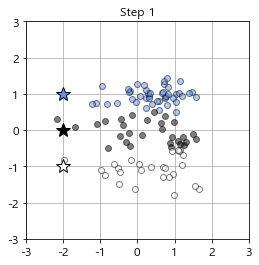

In [225]:
# r을 정한다 (Step 1) --------------------------------------------------------
def step1_kmeans(x0, x1, mu):
    N = len(x0)
    r = np.zeros((N, K))
    for n in range(N):
        wk = np.zeros(K)
        for k in range(K):
            wk[k] = (x0[n] - mu[k, 0]) ** 2 + (x1[n] - mu[k, 1]) ** 2
        r[n, np.argmin(wk)] = 1
    return r
# 메인 -----------------------------------------------------------------------
plt.figure(figsize=(4, 4))
R = step1_kmeans(X[:, 0], X[:, 1], Mu)
show_prm(X, R, Mu, X_col)
plt.title('Step 1')
plt.show()

In [226]:
Mu # 중심점

array([[-2,  1],
       [-2,  0],
       [-2, -1]])

In [228]:
X[:10, :]

array([[-0.14173827,  0.86533666],
       [-0.86972023, -1.25107804],
       [-2.15442802,  0.29474174],
       [ 0.75523128,  0.92518889],
       [-1.10193462,  0.74082534],
       [ 0.24206624,  0.88478369],
       [ 1.21899268, -0.20160497],
       [ 0.94827154, -1.20228673],
       [ 1.57414612, -0.2353623 ],
       [ 0.1311135 , -0.14825396]])

In [229]:
R[:10, :] # 각 데이터 포인트 별 cluster

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

#### Step 2: $\mu$의 갱신
- 각 클러스터에 속하는 데이터 점의 중심을 새로운 $\mu$로 한다
- 먼저 k=0에 속하는 데이터, 즉 $r_{n=0}\,=\,[1,\,0,\,0]$ 라벨을 가진 데이터 점에 주목하여 각 평균을 구함
$$\mu_{0,0}={{1}\over{N_{k}}}\sum_{n\;in\,cluster\;0}{x_{n0}},\quad{\mu_{0,1}={{1}\over{N_{k}}}\sum_{n\;in\,cluster\;0}{x_{n1}}}$$
- 동일한 절차를 k=1, k=2에도 적용하면 step 2 완료
$$\mu_{k,0}={{1}\over{N_{k}}}\sum_{n\;in\,cluster\;k}{x_{n0}},\quad{\mu_{k,1}={{1}\over{N_{k}}}\sum_{n\;in\,cluster\;k}{x_{n1}}}\qquad{(k\,=\,0,\,1,\,2)}$$

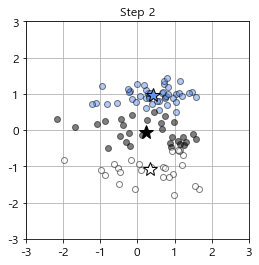

In [230]:
# Mu 결정 --------------------------------------------------------------------
def step2_kmeans(x0, x1, r):
    mu = np.zeros((K, 2))
    for k in range(K):
        mu[k, 0] = np.sum(r[:, k] * x0) / np.sum(r[:, k])
        mu[k, 1] = np.sum(r[:, k] * x1) / np.sum(r[:, k])
    return mu
# 메인 -----------------------------------------------------------------------
plt.figure(figsize=(4, 4))
Mu = step2_kmeans(X[:, 0], X[:, 1], R)
show_prm(X, R, Mu, X_col)
plt.title('Step 2')
plt.show()

In [231]:
Mu # 중심점

array([[ 0.42424083,  0.95688753],
       [ 0.23809508, -0.04801099],
       [ 0.35278574, -1.08063899]])

In [233]:
X[:10, :]

array([[-0.14173827,  0.86533666],
       [-0.86972023, -1.25107804],
       [-2.15442802,  0.29474174],
       [ 0.75523128,  0.92518889],
       [-1.10193462,  0.74082534],
       [ 0.24206624,  0.88478369],
       [ 1.21899268, -0.20160497],
       [ 0.94827154, -1.20228673],
       [ 1.57414612, -0.2353623 ],
       [ 0.1311135 , -0.14825396]])

In [234]:
R[:10, :] # 각 데이터 포인트 별 cluster

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

#### 전체과정 그려보기

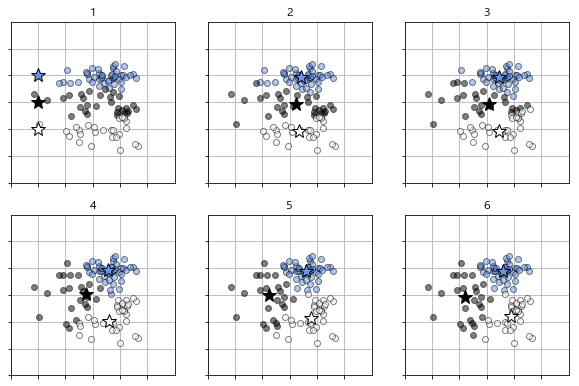

In [235]:
plt.figure(1, figsize=(10, 6.5))
Mu = np.array(
    [[-2, 1],
     [-2, 0],
     [-2, -1]]
)
max_iter = 6 # 반복 횟수
R_store = [] # R의 변화를 보기위해 list 생성
for it in range(0, max_iter):
    plt.subplot(2, 3, it + 1)
    R = step1_kmeans(X[:, 0], X[:, 1], Mu)
    R_store.append(R)
    show_prm(X, R, Mu, X_col)
    plt.title('{0:d}'.format(it + 1))
    plt.xticks(range(X_range0[0], X_range0[1]), "")
    plt.yticks(range(X_range1[0], X_range1[1]), "")
    Mu = step2_kmeans(X[:, 0], X[:, 1], R)
plt.show()

In [236]:
for ix, r in enumerate(R_store):
    print('\nr{}[:10, :]\n'.format(ix+1), r[:5, :])


r1[:10, :]
 [[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

r2[:10, :]
 [[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

r3[:10, :]
 [[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]

r4[:10, :]
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]

r5[:10, :]
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]

r6[:10, :]
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [237]:
Mu # 중심점

array([[ 0.59496069,  0.89951704],
       [-0.7431455 , -0.17177617],
       [ 0.95574399, -0.77383034]])

In [238]:
R[:10, :] # 각 데이터 포인트 별 cluster

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

### 왜곡 척도 (distortion measure)
- 데잍 점이 속한 클러스터의 중심까지의 제곱거리를 전체 데이터로 합한 것이 목적 함수에 대응
- 학습이 진행됨에 따라 감소하는 목적 함수
$$J\,=\,\sum_{n=0}^{N-1}\sum_{k=0}^{K-1}r_{nk}{|x_{n}-\mu_{k}|}^2$$

#### 초기값의 왜곡척도 구하기

In [205]:
# 목적 함수 ------------------------------------------------------------------
def distortino_measure(x0, x1, r, mu):
    # 입력은 2차원으로 제한
    N = len(x0)
    J = 0
    for n in range(N):
        for k in range(K):
            J += r[n, k] * ((x0[n] - mu[k, 0]) ** 2
                          + (x1[n] - mu[k, 1]) ** 2)
    return J
# Mu 및 R 초기화 -------------------------------------------------------------
Mu = np.array(
    [[-2, 1],
     [-2, 0],
     [-2, -1]]
)
R = np.c_[np.ones((N, 1), dtype=int), 
          np.zeros((N, 2), dtype=int)]
# test -----------------------------------------------------------------------
distortino_measure(X[:, 0], X[:, 1], R, Mu)

771.7091170334878

#### 반복에 의한 왜곡척도 계산

DM : [627.54  73.39  70.39  57.59  48.31  47.28  46.86  46.86  46.86  46.86]


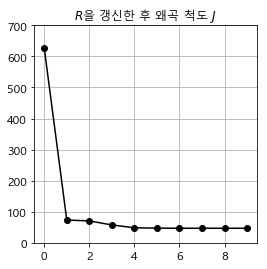

In [245]:
# Mu 및 R 초기화 -------------------------------------------------------------
Mu = np.array(
    [[-2, 1],
     [-2, 0],
     [-2, -1]]
)
R = np.c_[np.ones((N, 1), dtype=int), 
          np.zeros((N, 2), dtype=int)]
# 메인 -----------------------------------------------------------------------
N = X.shape[0]
K = 3
max_iter = 10
DM = np.zeros(max_iter) # 왜곡 척도의 계산 결과를 기록
for it in range(0, max_iter): # K-means 기법
    R = step1_kmeans(X[:, 0], X[:, 1], Mu)
    DM[it] = distortino_measure(X[:, 0], X[:, 1], R, Mu)
    Mu = step2_kmeans(X[:, 0], X[:, 1], R)
print('DM :', np.round(DM, 2))

plt.figure(2, figsize=(4, 4))
plt.plot(DM, color='k', ls='-', marker='o')
plt.ylim([0, 700])
plt.title('$R$을 갱신한 후 왜곡 척도 $J$')
plt.grid(True)
plt.show()

### $\textbf{K-means Clustering}$ 절차 요약
- K-means 기법으로 얻을 수 있는 해는 초기값 의존성이 있음
- 처음 $\mu$에 무엇을 할당하는 지에 따라 결과가 달라질 수 있음
- 실제로 다양한 $\mu$에서 시작하여 얻은 결과 중에 가장 왜곡 척도가 작은 결과를 사용하는 방법을 사용
- 또한 예제에서는 $\mu$를 먼저 정했지만 $R$을 먼저 결정해도 무방
- 이 경우 $R$을 임의로 정해 거기서 $\mu$를 찾아가는 절차

>>### K-medoids(객체, 대푯값) Clustering
- K-medoids는 k-means보다 Robust
    - noise, outlier에 덜 취약
    - medoid가 mean보다는 극단적인 outlier에 덜 취약함
    $$\underset{b,\,w}{min}\sum_{i}^{n}\sum_{j}^{k}w_{ij}{||x_i-b_j||}_2^2\;s.t.\,\sum_{j}w_{ij}=1,\,\forall{j}$$
    - $Absolute-error\;criterion\;:\;E\,=\,\sum_{i=1}^{k}\sum_{p\in{C_{i}}}dist(p,\,o_i)^2$
        - $where\;p\;is\;the\;object\;in\;the\;data\;set,\;o_i\;is\;the\;repersentatie\;object\;of\;C_i$
- $\textbf{Partitioning Around Medoids (PAM)}$ algorithm
- $\textbf{Clustering LARge Applications (CLARA)}$ algorithm

>>### GMM(Gaussian Mixture Model)
- em algorithm

In [248]:
import numpy.linalg as LA

# 가우스 함수 -----------------------------------------------
def gauss(x, mu, sigma):
    N, D = x.shape
    c1 = 1 / (2 * np.pi) ** (D / 2)
    c2 = 1 / (LA.det(sigma) ** .5)
    inv_sigma = LA.inv(sigma)
    c3 = x - mu
    c4 = np.dot(c3, inv_sigma)
    c5 = np.zeros(N)
    for d in range(D):
        c5 += c4[:, d] * c3[:, d]
    p = c1 * c2 * np.exp(-c5 / 2)
    return p

x = np.array(
    [[1, 2],
     [2, 1],
     [3, 4]]
)
mu = np.array([1, 2])
sigma = np.array(
    [[1, 0],
     [0, 1]]
)
print(gauss(x, mu, sigma))

[0.15915494 0.05854983 0.00291502]


In [249]:
# 가우시안 혼합 모델 ----------------------------------------
def mixgauss(x, pi, mu, sigma):
    N, D = x.shape
    K = len(pi)
    p = np.zeros(N)
    for k in range(K):
        p += pi[k] * gauss(x, mu[k, :], sigma[k, :, :])
    return p
# test ------------------------------------------------------
x = np.array(
    [[1, 2],
     [2, 2],
     [3, 4]]
)
pi = np.array([.3, .7])
mu = np.array(
    [[1, 1],
     [2, 2]]
)
sigma = np.array(
    [
        [[1, 0],
         [0, 1]],
        [[2, 0],
         [0, 1]]
    ]
)
print(mixgauss(x, pi, mu, sigma))

[0.09031182 0.09634263 0.00837489]


c:\users\affinity\.conda\envs\ds\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'color'
  s)


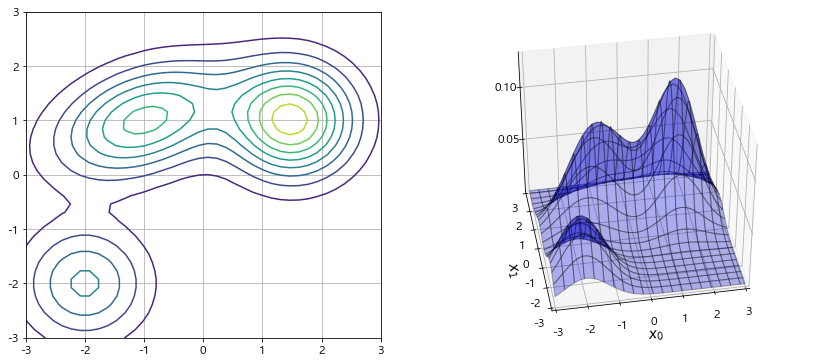

In [253]:
from mpl_toolkits.mplot3d import axes3d

# 혼합 가우스 등고선 표시 -----------------------------------
def show_contour_mixgauss(pi, mu, sigma):
    xn = 40 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, xn * xn, 1), np.reshape(xx1, xn * xn, 1)]
    f = mixgauss(x, pi, mu, sigma).reshape(xn, xn).T
    plt.contour(x0, x1, f, 10, color='gray')
# 혼합 가우스 3D 표시 ---------------------------------------
def show3d_mixgauss(ax, pi, mu, sigma):
    xn = 40
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, xn * xn, 1), np.reshape(xx1, xn * xn, 1)]
    f = mixgauss(x, pi, mu, sigma).reshape(xn, xn).T
    ax.plot_surface(xx0, xx1, f,
                  rstride=2, cstride=2, alpha=.3,
                  color='blue', edgecolor='black')
# test ------------------------------------------------------
pi = np.array([.2, .4, .4])
mu = np.array(
    [[-2, -2],
     [-1, 1],
     [1.5, 1]]
)
sigma = np.array(
    [
        [[.5, 0],
         [0, .5]],
        [[1, .25],
         [.25, .5]],
        [[.5, 0],
         [0, .5]]
    ]
)

Fig = plt.figure(1, figsize=(14, 6))
Fig.add_subplot(1, 2, 1)
show_contour_mixgauss(pi, mu, sigma)
plt.grid(True)

Ax = Fig.add_subplot(1, 2, 2, projection='3d')
show3d_mixgauss(Ax, pi, mu, sigma)
Ax.set_zticks([.05, .10])
Ax.set_xlabel('$x_0$', fontsize=14)
Ax.set_ylabel('$x_1$', fontsize=14)
Ax.view_init(40, -100)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()

module 3.
http://naver.me/GbiQK7zo
1. 4  
2. 3  
3. 4  
4. 1  
5. 3  
6. 2  
7. 3  
8. 1  
9. 2  X > 4
10. 3  
11. 2  
12. 3  X > 4 ??
13. 4  
14. 1  
15. 2  